# MUSIC OVER THE LAST 50 YEARS 

#### BY

##### SHAARIQ CHUNDRIGAR

# Introduction
- In this project, we aimed to answer the following questions:
- Is music in general positive or negative?
- Who are some of the most positive artists, and who are the most negative?
- Has (popular) music gotten more or less positive in the last 50 years?
- Can we predict music sentiment (i.e. positive or negative)?
- What are the most popular words in music? What are the most popular words in positive songs, and most popular - - words in negative songs? Do the most frequently used words change each decade?
- Has the use of profanities become more prominent in recent years?
- Are songs becoming more or less unique (i.e. repetitive)?

We used the following datasets for our analysis:
- [Billboard 1964-2015 Songs and Lyrics (5100 songs)](https://www.kaggle.com/rakannimer/billboard-lyrics/kernels)
- [Sing a Song Lyrics (51000 songs)](https://www.kaggle.com/devisangeetha/sing-a-song-lyrics-is-here)
- Both datasets give us song lyrics and the years they were released. The smaller one allowed to specifically look at the most popular music over the last 50 years (5100 songs).

# Important Concepts
Before we begin, it is important that we define some basic definitions to help keep a standard for the analysis to come. Some important definitions/concepts:
- Sentiment analysis: Sentiment is essentially a numerical representation of whether a piece of text (in our case, lyrics) is positive or negative. It ranges from -1 to 1. Positive can be defined as happy, uplifting, etc. Negative is, of course, the opposite. We define positive as >0.2, and negative <-0.2.
- Song uniqueness: this essentially defines how repetitive a song is. For instance, if a song has more choruses than it does verses, chances are it would have a low uniqueness ratio, and would rank quite low in our chart. On the other hand, a song with more unique verses and less repeated choruses would result in a higher uniqueness ratio.

In [1]:
# Importing of necessary modules
import multiprocessing, textblob, zlib, nltk, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use("ggplot")
import seaborn as sns
sns.set(font_scale=1.5)
%matplotlib inline
from collections import Counter
rx = re.compile('\W+')
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from itertools import cycle, islice
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from utils import get_cursewords
stop = stopwords.words('english')
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Conor/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Reading in lyrics database
df1 = pd.read_csv("files/billboardlyricsnow.csv", encoding='latin-1')
df2 = pd.read_csv("files/songdata.csv")
# Orginal size of the dataframe
df1.head()
df2.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [3]:
# Get curse words
arrBad = get_cursewords()

In [4]:
# Dropping links in the database, as they are an unnecessary column (for our purposes)
df2.drop('link', axis=1, inplace=True)

In [5]:
# Dropping nan, instrumentals, and songs with empty lyrics as 
# they serve no purpose in sentiment analysis.
df1.replace('',np.nan, inplace=True)
df1.replace('instrumental',np.nan, inplace=True)
df1.replace(' ',np.nan, inplace=True)
df2.replace('',np.nan,inplace=True)
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [6]:
# applying sentiment analysis to all the lyrics in the 'sing a song' database.
df2Sentiment = df2.apply(lambda r: sid.polarity_scores(r.text), axis=1)

In [7]:
# appending the sentiment scores to the original dataframe
d = pd.DataFrame(list(df2Sentiment))
df2 = df2.join(d)

In [8]:
# Adding number of songs-per-artist column to dataframe
df2['Counts'] = df2.groupby('artist')['text'].transform('count')

In [9]:
# Removing all artists with less than 15 songs, since they distort the following graphs
df2 = df2[df2['Counts'] > 15]
def get_count(values):
    return np.mean(values)
g1 = df2.groupby('artist').compound.agg(get_count)
g2 = df2.groupby('artist').neg.agg(get_count)
g3 = df2.groupby('artist').neu.agg(get_count)
g4 = df2.groupby('artist').pos.agg(get_count)

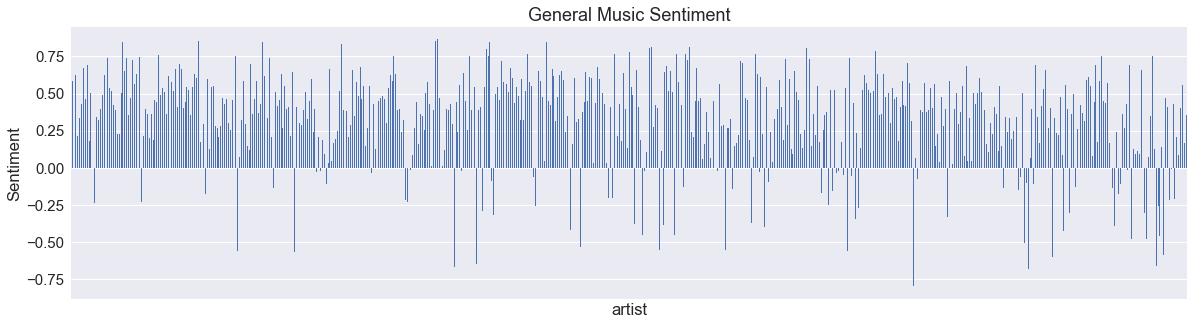

In [10]:
plt.figure(figsize=(20,5))
plt.ylabel("Sentiment")
plt.title("General Music Sentiment")
g1.plot.bar();
plt.xticks([]);

We can see from here that most artists (that are most listened to) are generally positive. It seems that it is quite rare for songs to be negative (perhaps it just doesn't sell well enough). Next, we will take a look at what artists are the most positive/negative.

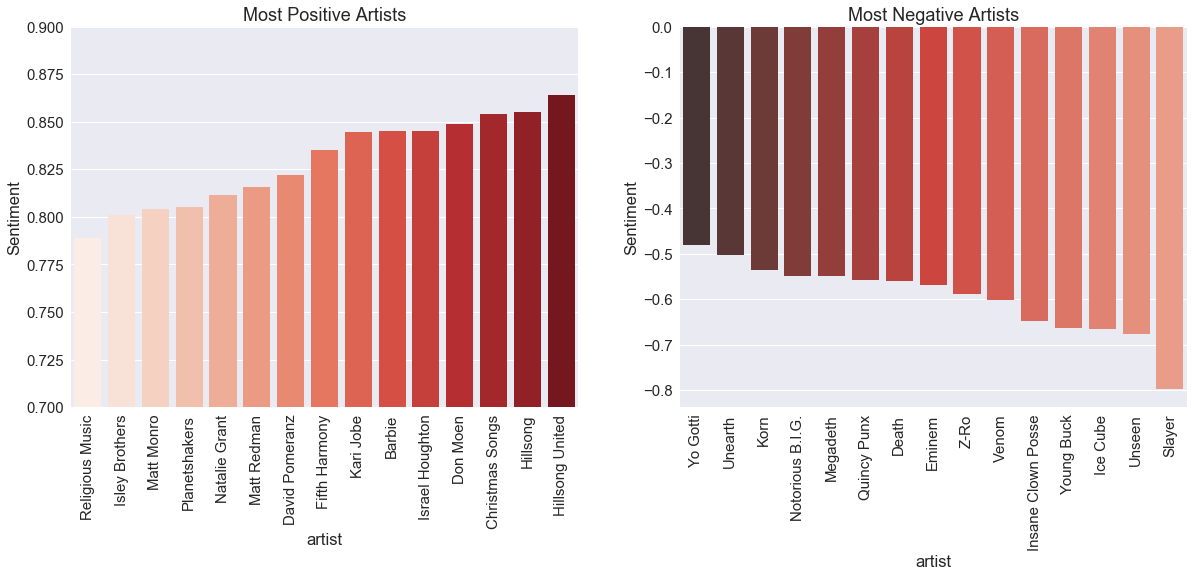

In [11]:
# Create a series of most positive and negative artists
most_pos = g1.sort_values(ascending=True)[-15:]
most_neg = g1.sort_values(ascending=False)[-15:]

# Plotting the data itself
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
ax[0].set_ylim(0.7,0.9)
tg = sns.barplot(most_pos.index,most_pos.values,ax=ax[0], palette='Reds')
tg.set_xticklabels(most_pos.index,rotation=90);
tg.set_title("Most Positive Artists")
tg.set_ylabel("Sentiment")
tg = sns.barplot(most_neg.index,most_neg.values,ax=ax[1], palette='Reds_d')
tg.set_xticklabels(most_neg.index,rotation=90);
tg.set_title("Most Negative Artists")
tg.set_ylabel("Sentiment");

We can see here that:
- Generally, the most positive artists seem to be pop/gospel artists, which makes sense given that both those genres are meant to be uplifting/inspirational.
- On the other hand, the most negative artists seem to be heavy metal and rap artists (Slayer and Eminem, for instance). Once again, this makes sense given the kind of music they produce.

We can see there is a vast difference in the genres that would be considered positive/negative.

In [12]:
# Get sentiments for all lyrics in the billboards database
sentiments = df1.apply(lambda r: sid.polarity_scores(r.Lyrics), axis=1)

In [13]:
# Append sentiment scores to original database.
d = pd.DataFrame(list(sentiments))
df1 = df1.join(d)
df1.dropna(inplace=True)

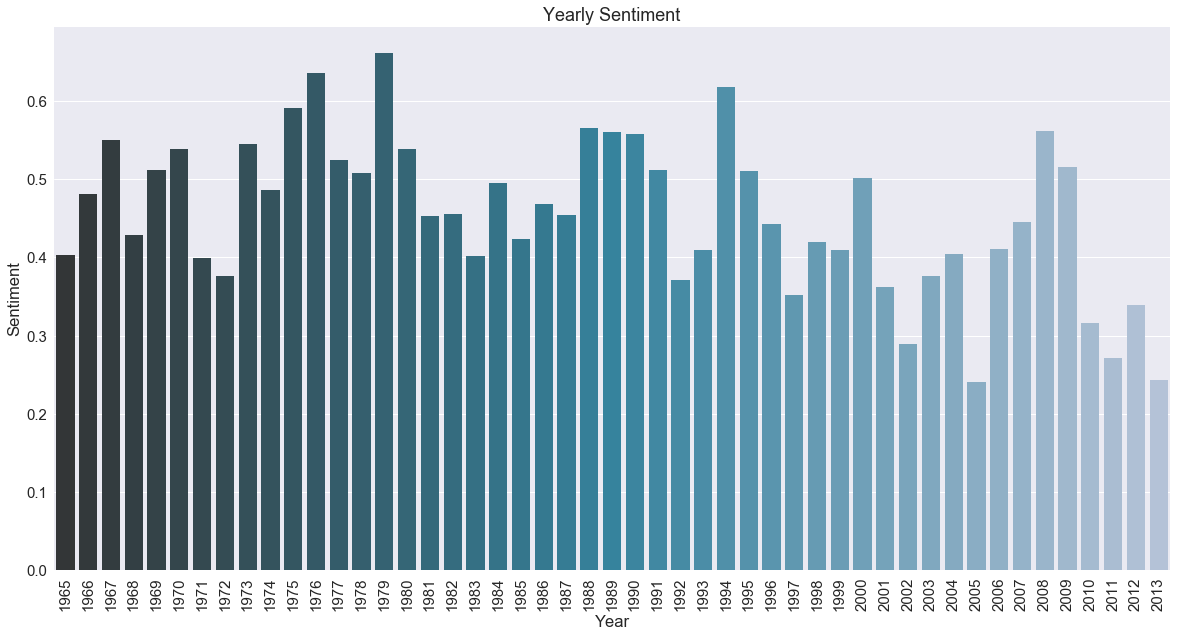

In [14]:
# Plotting sentiment by year
yearly_sentiment = df1.groupby('Year').compound.agg(get_count)
plt.figure(figsize=(20,10))
tg = sns.barplot(yearly_sentiment.index,yearly_sentiment.values, palette="PuBuGn_d")
tg.set_ylabel("Sentiment")
tg.set_xticklabels(yearly_sentiment.index,rotation=90);
tg.set_title("Yearly Sentiment")

From the above graph we can see that sentiment in popular music has not changed much over the years. There does seem to be a slight decline, but this is only somewhat visually identifiable. Some interesting things to note from this graph however:
- The peak of sentiment in popular music was in 1979. This was around the time when disco was it's highest and was one of the more popular genres. It is quite upbeat and uplifting, and thus makes sense that it would have a high sentiment value. And this appears to reflect in the graph as well, since around the mid-late 70s and early 80s, sentiment was at its' peak.
- Sentiment was lowest in 2005. However, we are not sure why this may be. Perhaps there was an overly negative song in the top 100 for that year which brought down the overall average quite heavily. It also appears that 2013 is close to 2005 in sentiment.

Next, we'll be doing some word analysis on the lyrics (common words, profanity, etc).

This is the start of looking at which words are most frequently used. To do this we had to create a new column and removed all the stopwords (e.g. 'the','as','if', etc.). Also made sure that the lyrics and Cleaned Lyrics were strings, since the first time we ran this it kept giving errors that all the oher code is not applicable to this data type. We got the top 100 words across all songs in the billboard 100 end of year chart over the last 50 years as a result.

In [15]:
# Make sure the lyrics are string
df1['Lyrics'] = df1['Lyrics'].astype(str)
# Put the lyrics into a new column 'CleanedLyrics
df1['CleanedLyrics'] = df1['Lyrics'].str.lower().str.split()
# Remove all stopwords from the lyrics 
df1['CleanedLyrics'] = df1['CleanedLyrics'].apply(lambda x: [item for item in x if item not in stop])
df1.head()

,Rank,Song,Artist,Year,Lyrics,Source,compound,neg,neu,pos,CleanedLyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,-0.9946,0.352,0.628,0.020,"[sam, sham, miscellaneous, wooly, bully, wooly..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,0.2624,0.159,0.704,0.137,"[sugar, pie, honey, bunch, know, love, cant, h..."
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0000,0.000,0.000,0.000,[]
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,-0.9607,0.186,0.754,0.061,"[woke, morning, mind, mind, got, troubles, who..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,0.9958,0.085,0.649,0.266,"[never, close, eyes, anymore, kiss, lips, ther..."


In [16]:
# Make sure CleanedLyrics are string
df1['CleanedLyrics'] = df1['CleanedLyrics'].astype(str)

# Count all words and pick the top 100 common words
commonWords = Counter(" ".join(df1['CleanedLyrics']).split()).most_common(100)
print(commonWords)

[("'love',", 14418), ("'im',", 13080), ("'dont',", 10822), ("'know',", 10507), ("'like',", 10096), ("'oh',", 8965), ("'baby',", 8584), ("'get',", 7831), ("'got',", 7654), ("'youre',", 6245), ("'want',", 5868), ("'yeah',", 5790), ("'go',", 5705), ("'make',", 5291), ("'one',", 5075), ("'cant',", 5058), ("'see',", 4945), ("'time',", 4897), ("'let',", 4662), ("'come',", 4620), ("'say',", 4527), ("'never',", 4511), ("'girl',", 4482), ("'wanna',", 4433), ("'cause',", 4359), ("'way',", 4299), ("'gonna',", 4271), ("'take',", 4066), ("'ill',", 3998), ("'back',", 3729), ("'right',", 3713), ("'feel',", 3475), ("'need',", 3427), ("'night',", 3381), ("'aint',", 3297), ("'tell',", 3119), ("'give',", 2958), ("'could',", 2834), ("'heart',", 2718), ("'life',", 2715), ("'good',", 2683), ("'thats',", 2548), ("'think',", 2501), ("'ive',", 2455), ("'away',", 2442), ("'little',", 2432), ("'keep',", 2390), ("'ya',", 2326), ("'man',", 2296), ("'well',", 2218), ("'wont',", 2178), ("'around',", 2126), ("'day',"

this first wordcloud displays the most frequently used words across all popular songs in the last 50 years. Love is clearly the most written about topic in terms of song writing. A lot of the smaller surrounding words compliment it as well, with words such as 'feel', 'want', 'baby', 'heart', all being words that you would here in a song about love.

It's also a look into the proportion of how the words are used, since the wordcloud chooses the size of the word based on the frequency in comparison to everything else.

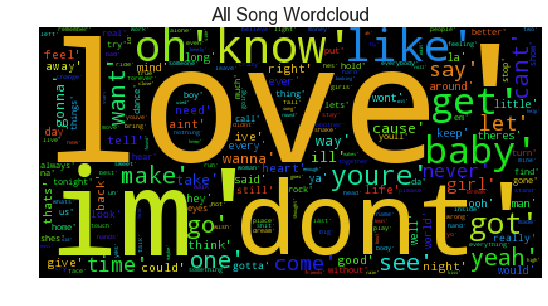

In [17]:
# Create a wordcloud to display most common words
wordcloud = WordCloud().generate(' '.join(df1['CleanedLyrics']))
plt.rcParams["figure.figsize"] = (9,9)
plt.title('All Song Wordcloud')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Created a new dataframe so we could have one where all the years were in there respective decades instead (e.g. 1965 is now 60s, 1981 is now 80s). This is so we can get a broader look at the frequency of words over time.

In [18]:
# Create a new to dataframe to change years to decade
dfDecade = pd.read_csv("files/billboardlyricsnow.csv", encoding='latin-1')
dfDecade.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [19]:
# Replace all years ith a decade
dfDecade.replace([x for x in range(1960,1970)], '60s', inplace=True)
dfDecade.replace([x for x in range(1970,1980)], '70s', inplace=True)
dfDecade.replace([x for x in range(1980,1990)], '80s', inplace=True)
dfDecade.replace([x for x in range(1990,2000)], '90s', inplace=True)
dfDecade.replace([x for x in range(2000,2010)], '00s', inplace=True)
dfDecade.replace([x for x in range(2010,2016)], '10s', inplace=True)

print(dfDecade.shape)
dfDecade.head()

(5100, 6)


,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,60s,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,60s,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,60s,,1.0
3,4,you were on my mind,we five,60s,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,60s,you never close your eyes anymore when i kiss...,1.0


In [20]:
# do the same cleaning lyrics process as we did on df1
dfDecade['Lyrics'] = dfDecade['Lyrics'].astype(str)
dfDecade['CleanedLyrics'] = dfDecade['Lyrics'].str.lower().str.split()
dfDecade['CleanedLyrics'] = dfDecade['CleanedLyrics'].apply(lambda x: [item for item in x if item not in stop])
dfDecade.head()

,Rank,Song,Artist,Year,Lyrics,Source,CleanedLyrics
0,1,wooly bully,sam the sham and the pharaohs,60s,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, sham, miscellaneous, wooly, bully, wooly..."
1,2,i cant help myself sugar pie honey bunch,four tops,60s,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, know, love, cant, h..."
2,3,i cant get no satisfaction,the rolling stones,60s,,1.0,[]
3,4,you were on my mind,we five,60s,when i woke up this morning you were on my mi...,1.0,"[woke, morning, mind, mind, got, troubles, who..."
4,5,youve lost that lovin feelin,the righteous brothers,60s,you never close your eyes anymore when i kiss...,1.0,"[never, close, eyes, anymore, kiss, lips, ther..."


In [21]:
# Go through and find songs that appear in the specifc decade
df60 = dfDecade.loc[dfDecade['Year'] == '60s']
df60['CleanedLyrics'] = df60['CleanedLyrics'].apply(lambda x: ' '.join(x))
#Pick the most common words from the decade
commonWords60 = Counter(" ".join(df60['CleanedLyrics']).split()).most_common(200)

# Repeat for all decades
df70 = dfDecade.loc[dfDecade['Year'] == '70s']
df70['CleanedLyrics'] = df70['CleanedLyrics'].apply(lambda x: ' '.join(x))
commonWords70 = Counter(" ".join(df70['CleanedLyrics']).split()).most_common(200)

df80 = dfDecade.loc[dfDecade['Year'] == '80s']
df80['CleanedLyrics'] = df80['CleanedLyrics'].apply(lambda x: ' '.join(x))
commonWords80 = Counter(" ".join(df80['CleanedLyrics']).split()).most_common(200)

df90 = dfDecade.loc[dfDecade['Year'] == '90s']
df90['CleanedLyrics'] = df90['CleanedLyrics'].apply(lambda x: ' '.join(x))
commonWords90 = Counter(" ".join(df90['CleanedLyrics']).split()).most_common(200)

df00 = dfDecade.loc[dfDecade['Year'] == '00s']
df00['CleanedLyrics'] = df00['CleanedLyrics'].apply(lambda x: ' '.join(x))
commonWords00 = Counter(" ".join(df00['CleanedLyrics']).split()).most_common(200)

df10 = dfDecade.loc[dfDecade['Year'] == '10s']
df10['CleanedLyrics'] = df10['CleanedLyrics'].apply(lambda x: ' '.join(x))
commonWords10 = Counter(" ".join(df10['CleanedLyrics']).split()).most_common(200)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Below, we can see each wordcloud for each decade. For the most part, the most common words stay similar to the overall wordcloud from before, with variations in which words is more popular. Interestingly enough despite 'Love' being the overwhelming most used word, it is only the most used word through four decades. The two most recent decades being the one we are currently in and the 2000s, both have 'I'm' as there most popular word, and 'Love' drops down quite rapidly down to 6th in the 2000s which is strange considering it had held first place for four decades.

This is perhaps a sign that the topic of love in songs is either going out of fashion on just not used as much anymore since it is  topic that has been done in every way possible. Artists today seem to be more focused on themselves, and not necessarily in the narcistic way but in the a self evaluation way. Looking over there life, telling there stories and experiences.

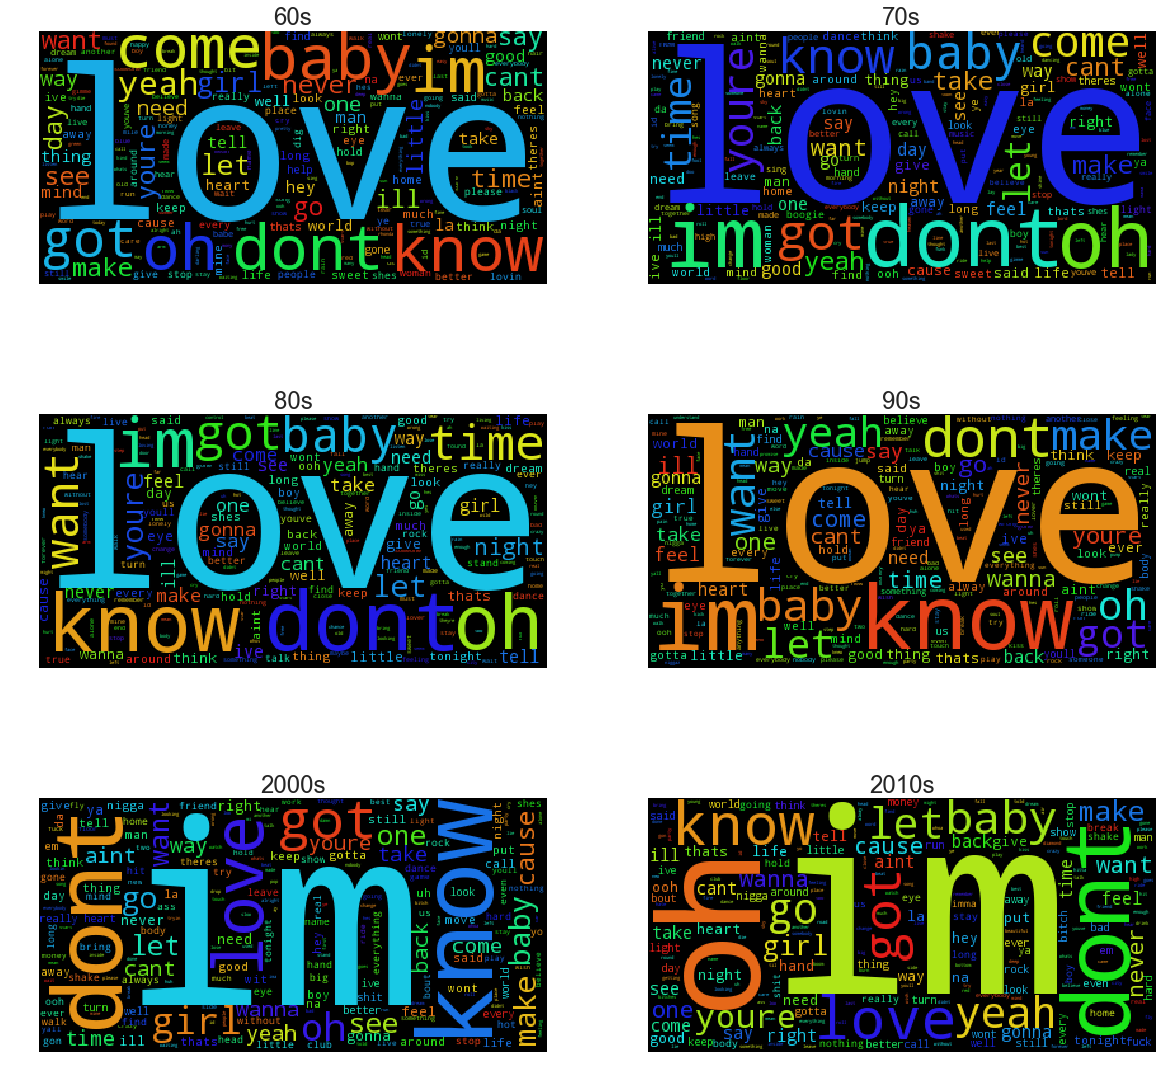

In [22]:
# Set size of the plots
fig, ax = plt.subplots(3,2, figsize=(20,20))
sns.set(font_scale=2.0)
# Plot a wordcloud for the decade
wordcloud60 = WordCloud().generate(' '.join(df60['CleanedLyrics']))
ax[0,0].imshow(wordcloud60)
ax[0,0].axis("off")
ax[0,0].set_title("60s")

# Repeat for all decades 
wordcloud70 = WordCloud().generate(' '.join(df70['CleanedLyrics']))
ax[0,1].imshow(wordcloud70)
ax[0,1].axis("off")
ax[0,1].set_title("70s")

wordcloud80 = WordCloud().generate(' '.join(df80['CleanedLyrics']))
ax[1,0].imshow(wordcloud80)
ax[1,0].axis("off")
ax[1,0].set_title("80s")

wordcloud90 = WordCloud().generate(' '.join(df90['CleanedLyrics']))
ax[1,1].imshow(wordcloud90)
ax[1,1].axis("off")
ax[1,1].set_title("90s")

wordcloud00 = WordCloud().generate(' '.join(df00['CleanedLyrics']))
ax[2,0].imshow(wordcloud00)
ax[2,0].axis("off")
ax[2,0].set_title("2000s")

wordcloud10 = WordCloud().generate(' '.join(df10['CleanedLyrics']))
ax[2,1].imshow(wordcloud10)
ax[2,1].axis("off")
ax[2,1].set_title("2010s");
sns.set(font_scale=1.5)

We created two more dataframes this time one containing the most positive songs based on the semtiment analysis we did earlier and the other containing the most negative songs. The positive songs were chosen if they had a compound value above 0.9, whilst the negative songs were chosen if they had a compound value below -0.9. We decided to use the song title here instead of the lyrics, because after looking at the lyrics they didn't give the same difference as the song titles seemed to in terms of common words.

In [23]:
# Create new colum 'CleanedSongs' for songs to be cleaned
df1['CleanedSongs'] = df1['Song'].str.lower().str.split()
# Remove stopwords from song titles and store them in CleanedSongs
df1['CleanedSongs'] = df1['CleanedSongs'].apply(lambda x: [item for item in x if item not in stop])

# Select the most positive songs
train_pos = df1[df1['compound'] > 0.9]

# Select the most negative songs
train_neg = df1[df1['compound'] < -0.9]
train_neg.head()

,Rank,Song,Artist,Year,Lyrics,Source,compound,neg,neu,pos,CleanedLyrics,CleanedSongs
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,-0.9946,0.352,0.628,0.020,"['sam', 'sham', 'miscellaneous', 'wooly', 'bul...","[wooly, bully]"
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,-0.9607,0.186,0.754,0.061,"['woke', 'morning', 'mind', 'mind', 'got', 'tr...",[mind]
11,12,king of the road,roger miller,1965,trailer for sale or rent rooms to let fifty c...,1.0,-0.9817,0.189,0.803,0.008,"['trailer', 'sale', 'rent', 'rooms', 'let', 'f...","[king, road]"
14,15,shotgun,junior walker the all stars,1965,i said Ì¢shotgun shoot em for he runs now do t...,3.0,-0.9559,0.170,0.813,0.017,"['said', 'ì¢shotgun', 'shoot', 'em', 'runs', '...",[shotgun]
22,23,ill never find another you,the seekers,1965,theres a new world somewhere they call the pr...,1.0,-0.9761,0.317,0.535,0.148,"['theres', 'new', 'world', 'somewhere', 'call'...","[ill, never, find, another]"


We can se in the negative wordcloud that 'Love' is the once again the most used topic in songs this time the songs being negative songs. A lot of the bigger words in the cloud are the usual suspects that we've seen in the other clouds, however the smaller words are where you can see the negative words come through with words such as 'bad', 'ill', 'broken','goodbye', and 'dead'. The negative songs seem to follow the concept of a breakup or being lonely.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


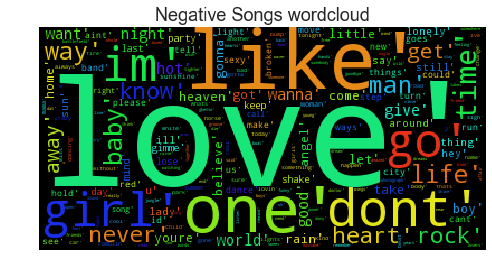

In [24]:
# Make sure negative song names are strings
train_neg['CleanedSongs'] = train_neg['CleanedSongs'].astype(str)

# Create wordcloud for negative song name words
wordcloud_neg = WordCloud().generate(' '.join(train_neg['CleanedSongs']))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title("Negative Songs wordcloud")
plt.show()

As for the positive wordcloud we also see 'Love' as the most common word, however it is in completely different context to the negative cloud based on looking at the smaller surrounding words. A lot more positive words in with words such as 'good', 'sweet', 'heaven', 'heart', and 'Beautiful'. The positive songs topics seem to more revolve around falling in love or being in love.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


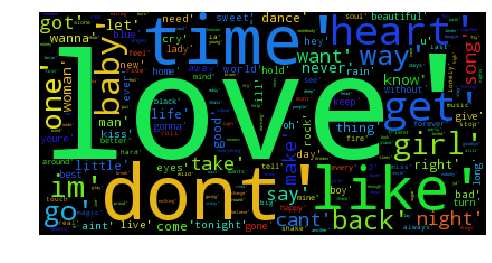

In [25]:
# Make sure positive songs are strings
train_pos['CleanedSongs'] = train_pos['CleanedSongs'].astype(str)

# Create wordcloud for positive song names words
wordcloud_pos = WordCloud().generate(' '.join(train_pos['CleanedSongs']))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.show()

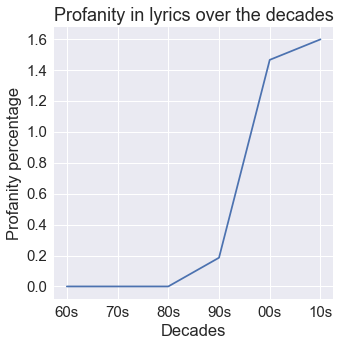

In [26]:
# Swear words
decades = ['60s','70s','80s','90s','00s','10s']
commonWords = [commonWords60, commonWords70, commonWords80, commonWords90, commonWords00, commonWords10]
counts = []
# Calculating the percentage of swear words in the most common words of each decade
for item in commonWords:
    totalCount = 0
    count = 0
    for key,value in item:
        if key in arrBad:
            count += value
        totalCount += value
    counts.append(count/totalCount * 100)
plt.figure(figsize=(5,5))
plt.plot(np.arange(len(decades)), counts);
plt.xticks(np.arange(len(decades)), decades)
plt.title("Profanity in lyrics over the decades")
plt.xlabel("Decades")
plt.ylabel("Profanity percentage");

Some observations:
- Profanity seems to have gone up in music starting the 90s.
- Perhaps this could be due to the rise in popularity of hip/hop and rap, which in general contains more profanity than, for instance, rock (note: this is a personal observation). 
- This could also be attributed to the fact that songs in general are less likely to get censored. Perhaps back in the day it was more controlled, but nowadays due to the fact that it is so easy to publish music, it is probably leading to more freedom of control of what we can say in music.

However, something to consider:
- This is for the top 100 songs every year. These tend to be pop songs, and thus is probably not representative of the rise/fall of profanity in music in general.

In [27]:
# Making an attempt at predicting yearly sentiment
import statsmodels.api as sm
train, test = train_test_split(yearly_sentiment,test_size=0.1)
x = train.index.to_series()
y = pd.Series(train.values)
x = x.values.reshape(len(x),1)
y = y.values.reshape(len(y),1)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)

# Print out the statistics
model.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     9.686
Date:                Sun, 12 Nov 2017   Prob (F-statistic):            0.00334
Time:                        14:34:34   Log-Likelihood:                 44.828
No. Observations:                  44   AIC:                            -85.66
Df Residuals:                      42   BIC:                            -82.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4426      1.922      3.352      0.002       2.564      10.321
x1            -0.0030      0.001     -3.112      0.003      -0.005      -0.001
==============================================================================
Omnibus:                        0.745   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.773
Skew:                           0.107   Prob(JB):                        0.679
Kurtosis:                       2.387   Cond. No.                     2.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We get a general word count of the amount of lyrics in each song and store it in a new column. It's important that we used the orignal lyrics for this and the cleaned one as it might mess up what the correct result would be with all the stopwords removed with some songs having more than others.

In [28]:
# Count the amount of words in each song and store it in a new column 'wordCount'
df1['wordCount'] = df1['Lyrics'].str.split().str.len()
df1.head()

,Rank,Song,Artist,Year,Lyrics,Source,compound,neg,neu,pos,CleanedLyrics,CleanedSongs,wordCount
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,-0.9946,0.352,0.628,0.020,"['sam', 'sham', 'miscellaneous', 'wooly', 'bul...","[wooly, bully]",125
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,0.2624,0.159,0.704,0.137,"['sugar', 'pie', 'honey', 'bunch', 'know', 'lo...","[cant, help, sugar, pie, honey, bunch]",204
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0000,0.000,0.000,0.000,[],"[cant, get, satisfaction]",0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,-0.9607,0.186,0.754,0.061,"['woke', 'morning', 'mind', 'mind', 'got', 'tr...",[mind],152
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,0.9958,0.085,0.649,0.266,"['never', 'close', 'eyes', 'anymore', 'kiss', ...","[youve, lost, lovin, feelin]",232


Based on the plot below we can see that the average amount of words in a song has increased over the last 50 years. Throughtout the 60s it is around 200 words a song, but by early 2000s we are hovering around 500 words each song, giving a steep climb of 300 words at best. As we head into the 2010s though, we see it seems to start trending back downwards. 

The increase in words could be attributed to the fact that songs are getting longer meaning that artists are able to fit more words into there songs. On top of this the rise of rap and rnb could contribute to increased word counts since they are both lyrically dense art forms, where as rock which was more popular through the 60s 70s and 80s contained more focus on the instrumental with solos. 

The drop as we near todays music in the 2010s could be due to the rise in Electronic dance music where the focus is more on the DJ and the beat that is playing with very little lyrical content.

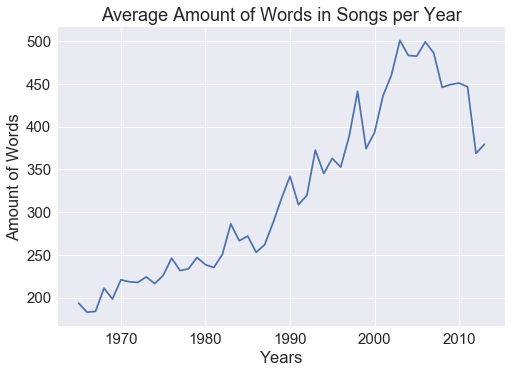

In [29]:
# Plot the average word count for each year
plt.plot(df1.groupby(['Year'])['wordCount'].mean())
plt.title('Average Amount of Words in Songs per Year')
plt.xlabel('Years')
plt.ylabel('Amount of Words')

In [31]:
# Resets dataframe to start index
df1.reset_index(inplace = True)
# Create new column 'uniqueCount
df1['uniqueCount'] = pd.Series(np.arange(len(df1)))

# Loop through each row and count the amount of unique words
current = 0
for row in df1.itertuples():
    df1['uniqueCount'][current] = len(np.unique(df1['Lyrics'].str.split()[current]))
    current = current + 1
df1.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,level_0,index,Rank,Song,Artist,Year,Lyrics,Source,compound,neg,neu,pos,CleanedLyrics,CleanedSongs,wordCount,uniqueCount
0,0,0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,-0.9946,0.352,0.628,0.020,"['sam', 'sham', 'miscellaneous', 'wooly', 'bul...","[wooly, bully]",125,64
1,1,1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,0.2624,0.159,0.704,0.137,"['sugar', 'pie', 'honey', 'bunch', 'know', 'lo...","[cant, help, sugar, pie, honey, bunch]",204,94
2,2,2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0000,0.000,0.000,0.000,[],"[cant, get, satisfaction]",0,0
3,3,3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,-0.9607,0.186,0.754,0.061,"['woke', 'morning', 'mind', 'mind', 'got', 'tr...",[mind],152,44
4,4,4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,0.9958,0.085,0.649,0.266,"['never', 'close', 'eyes', 'anymore', 'kiss', ...","[youve, lost, lovin, feelin]",232,88


we went through and found all the unique words in each of the lyrics and count them, so we can determine the if songs are more reptitve and less unique. First we plot the average amount of unique words each year. No suprise that it follows a similar trend to the total average word count, just on a lesser scale with it starting around 80 unique words in the 60s and peaking around 160 in the early 2000s. So all the same lows and peaks but a less steep climb.

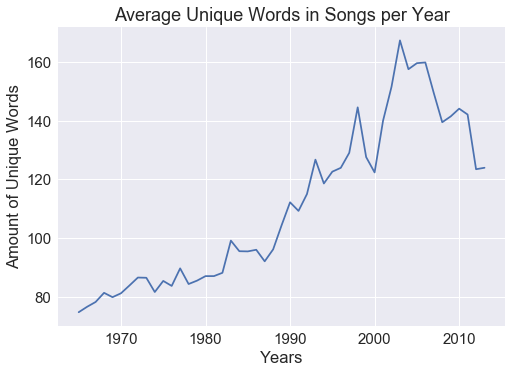

In [32]:
# Plot the average amount of unique words each year
plt.plot(df1.groupby(['Year'])['uniqueCount'].mean())
plt.title('Average Unique Words in Songs per Year')
plt.xlabel('Years')
plt.ylabel('Amount of Unique Words');

In [33]:
# Create the ratio of the amount of unique words to total words in each song
df1['uniqueRatio'] = df1['uniqueCount']/df1['wordCount']
df1.head()

,level_0,index,Rank,Song,Artist,Year,Lyrics,Source,compound,neg,neu,pos,CleanedLyrics,CleanedSongs,wordCount,uniqueCount,uniqueRatio
0,0,0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,-0.9946,0.352,0.628,0.020,"['sam', 'sham', 'miscellaneous', 'wooly', 'bul...","[wooly, bully]",125,64,0.512000
1,1,1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,0.2624,0.159,0.704,0.137,"['sugar', 'pie', 'honey', 'bunch', 'know', 'lo...","[cant, help, sugar, pie, honey, bunch]",204,94,0.460784
2,2,2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0000,0.000,0.000,0.000,[],"[cant, get, satisfaction]",0,0,NaN
3,3,3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,-0.9607,0.186,0.754,0.061,"['woke', 'morning', 'mind', 'mind', 'got', 'tr...",[mind],152,44,0.289474
4,4,4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,0.9958,0.085,0.649,0.266,"['never', 'close', 'eyes', 'anymore', 'kiss', ...","[youve, lost, lovin, feelin]",232,88,0.379310


the ratio was simply the amount of unique words over the total amount of words, to give us a look at how unique or reptitive the songs are.

Overall looking at the plot below, we see that the average ratio has gone down each year. This is despite the massive increase in word count in recent years, we see that songs are getting more repititive with songs through the 2000s and 2010s hovering around 0.33, meaning for every three words, only one has not already been used in the song. this is a big drop from the 60s where there is a peak of 0.45 so almost half of the song have are unique.

We could conclude from this that earlier music was more story telling, and expression, where as today we still have those stories but with a chorus that repeats itself in between verses making the song more repetitive.

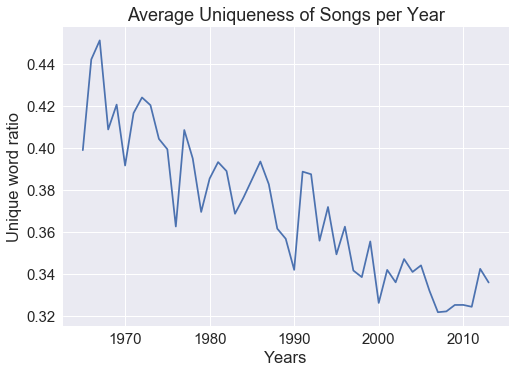

In [34]:
# Plot the unique ratio
plt.plot(df1.groupby(['Year'])['uniqueRatio'].mean())
plt.title('Average Uniqueness of Songs per Year')
plt.xlabel('Years')
plt.ylabel('Unique word ratio');

## Conclusion

Overall we were pretty happy with what we were able to accomplish. The sentiment anaylsis answered a lot of question we were looking to answer. It seemed that overall music is quite positive and that the most positive artists tend to be worship atists and pop artists, where as the negative artists were usually apart of the metal genre or rap genre.

We were able to see a slight trend downward in terms of music becoming more negative, but not enough to confidently state that music is getting more negative today than what it used to be. 

Predicting sentitment was not as useful as we would of liked, and perhaps with more time we would of spend some time fixing up a way we could predict semtiment for artists, or genre or the year.

It was quite obvious that Love was the most used word in music and plenty of other words that and many words that relate to love were also quite common, leading us to conclude that the topic of love, whether sung about in a positive light or negative way, was the most used topic for songwriting. In recent years we have seen a switch to 'I'm', and more songs centred around ones self.

We can also conclude that popular music is als now more accepting of swearing in songs. A song no longer has to be radio friendly to make the charts. The fact that there were no profanities in the first two decades (60s, 70s) leads us the believe that the censorship on swearing was quite strong and probably the same for all forms of entertainment.

Songs are overall less unique than what they were 50 years ago in terms of variation in the type of words used. We can conclude that songs have become more repititive and catchy.

#### Possible Future Work

It would be interesting to work with a dataframe that contained the genre that each song belonged to so we could possibly look at sentiment across genres properly. 

## References

https://stackoverflow.com/

https://pandas.pydata.org/pandas-docs/stable/

http://www.nltk.org/

https://matplotlib.org/contents.html